<a href="https://colab.research.google.com/github/ADv0rnik/Data-analysis-for-JER/blob/main/Area_of_research_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating a map of the research area**

In [4]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd

In [3]:
pip install geopandas

     |████████████████████████████████| 994 kB 5.1 MB/s 
     |████████████████████████████████| 6.6 MB 47.0 MB/s 
     |████████████████████████████████| 15.4 MB 36 kB/s 


In [5]:
path = '/content/drive/MyDrive/Colab Notebooks/Data for JER/Gomel_distr/Gomel_districts.shp' 
gomel = gpd.read_file(path)
gomel

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,Rad,geometry
0,22,BLR,Belarus,2,Homyel',17,Aktsyabar,Raion,District,None,Oktyabrski,10,"POLYGON ((3167705.449 6899649.390, 3167705.449..."
1,22,BLR,Belarus,2,Homyel',18,Brahin,Raion,District,None,None,1480,"POLYGON ((3403743.630 6747844.076, 3402871.823..."
2,22,BLR,Belarus,2,Homyel',19,Buda-Kashalyowa,Raion,District,None,Buda-Koshelevo,185,"POLYGON ((3369725.543 6904534.867, 3370288.204..."
3,22,BLR,Belarus,2,Homyel',20,Chachersk,Raion,District,None,Chechersk,555,"POLYGON ((3467256.218 7008020.133, 3468723.809..."
4,22,BLR,Belarus,2,Homyel',21,Dobrush,Raion,District,None,None,555,"POLYGON ((3514231.231 6915488.741, 3514573.924..."
5,22,BLR,Belarus,2,Homyel',22,Homyel',Raion,District,None,Homyel,37,"POLYGON ((3493105.098 6821950.158, 3493015.284..."
6,22,BLR,Belarus,2,Homyel',23,Kalinkavichy,Raion,District,None,Kalinkovichi,185,"POLYGON ((3325703.759 6873590.176, 3326679.393..."
7,22,BLR,Belarus,2,Homyel',24,Karma,Raion,District,None,Korma,555,"POLYGON ((3417648.587 7029741.223, 3417648.587..."
8,22,BLR,Belarus,2,Homyel',25,Khoyniki,Raion,District,None,Khoiniki,1480,"POLYGON ((3358858.745 6714645.411, 3358727.528..."
9,22,BLR,Belarus,2,Homyel',26,Loyew,Raion,District,None,Loev,185,"POLYGON ((3444535.524 6813344.887, 3444759.102..."


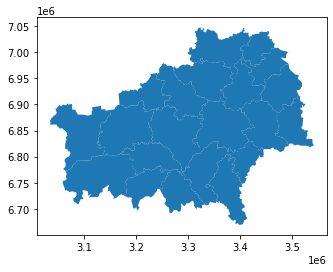

In [6]:
gomel.plot()